# import lib

In [123]:
#K折交叉验证（k-fold cross validation）https://www.cnblogs.com/bymo/p/9026198.html#_label0
#将数据集分成k份，每一轮用其中(k-1)份做训练而剩余1份做验证，以这种方式执行k轮，得到k个模型．将k次的性能取平均，作为该算法的整体性能．k一般取值为5或者10．

#优点：能比较鲁棒性地评估模型在未知数据上的性能．
#缺点：计算复杂度较大．因此，在数据集较大，模型复杂度较高，或者计算资源不是很充沛的情况下，可能不适用，尤其是在训练深度学习模型的时候．
#sklearn.model_selection提供了KFold以及RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold, GroupKFold, TimeSeriesSplit等变体．

#下面的例子中用的StratifiedKFold采用的是分层抽样，它保证各类别的样本在切割后每一份小数据集中的比例都与原数据集中的比例相同．
#
#dataset is  'https://www.kaggle.com/c/house-prices-advanced-regression-techniques'
#refer https://www.kaggle.com/marsggbo/kaggle/comments#%E4%BA%8C%E3%80%81%E8%A7%82%E5%AF%9F%E5%90%84%E9%A1%B9%E4%B8%BB%E8%A6%81%E7%89%B9%E5%BE%81%E4%B8%8E%E6%88%BF%E5%B1%8B%E5%94%AE%E4%BB%B7%E7%9A%84%E5%85%B3%E7%B3%BB

In [3]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns

# !pip3 install -q tensorflow==2.0.0-beta1
import tensorflow as tf


# import sklearn.preprocessing

In [4]:
print(tf.__version__)

1.13.1


# load data

In [5]:
dataset_train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
dataset_test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")


# dataset_train.describe()


In [6]:
# dataset_train.head()
dataset_train[['Neighborhood', 'CentralAir']].head()

,Neighborhood,CentralAir
0,CollgCr,Y
1,Veenker,Y
2,CollgCr,Y
3,Crawfor,Y
4,NoRidge,Y


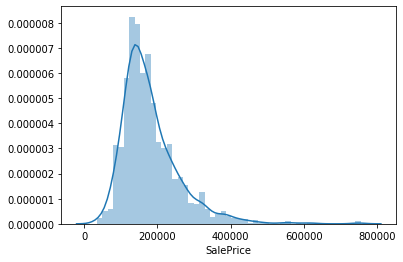

In [7]:
# show distirbution of sale price
sns.distplot(dataset_train['SalePrice'])

In [6]:
#find all category features
columns_numberic = dataset_train.dtypes[dataset_train.dtypes != 'object'].index
# print(columns_numberic)
columns_string = dataset_train.columns.difference(columns_numberic)
dataset_train[columns_string].head(10)
# dataset_train[columns_string].head()

# for column in columns_string:
#     label_encoder = preprocessing.LabelEncoder()
#     dataset_train[column] = label_encoder.fit_transform(dataset_train[column])

# dataset_train.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
5,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,Shed,Mitchel,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
6,NaN,1Fam,TA,Av,GLQ,Unf,Ex,Y,Norm,Norm,...,NaN,Somerst,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
7,NaN,1Fam,TA,Mn,ALQ,BLQ,Gd,Y,PosN,Norm,...,Shed,NWAmes,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
8,NaN,1Fam,TA,No,Unf,Unf,TA,Y,Artery,Norm,...,NaN,OldTown,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
9,NaN,2fmCon,TA,No,GLQ,Unf,TA,Y,Artery,Artery,...,NaN,BrkSide,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


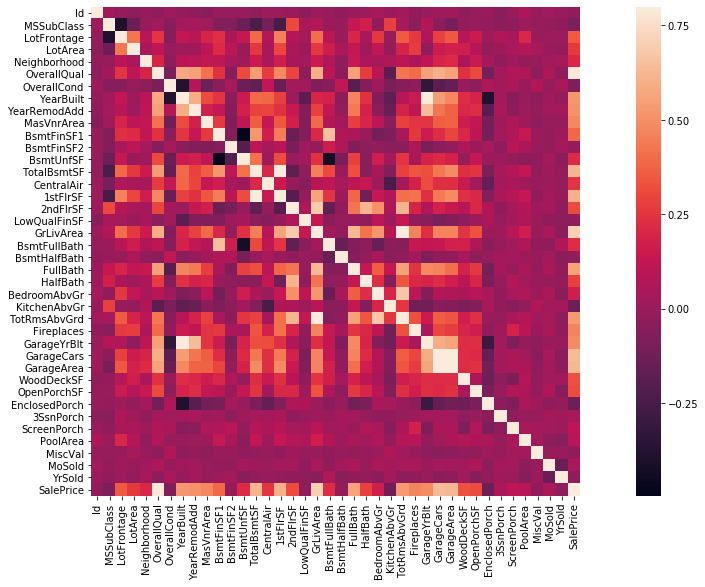

In [8]:
columns_string=['Neighborhood', 'CentralAir']
for column in columns_string:
    label_encoder = preprocessing.LabelEncoder()
    dataset_train[column] = label_encoder.fit_transform(dataset_train[column])
    
corrmat = dataset_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [7]:
dataset_train[columns_string].head()

,Neighborhood,CentralAir
0,5,1
1,24,1
2,5,1
3,6,1
4,15,1


# preprocess data

In [9]:
#concat train and test after filter column 'saleprice' in train , and remove column 'id'
dataset_all = pd.concat([dataset_train.iloc[:,1:-1], dataset_test.iloc[:,1:]], axis=0, ignore_index=True)

#normalize numberic variable
features_numberic = dataset_all.dtypes[dataset_all.dtypes != 'object'].index
dataset_all[features_numberic] = dataset_all[features_numberic].apply(lambda x : ((x - x.mean()) / x.std()))
dataset_all[features_numberic] = dataset_all[features_numberic].fillna(0)

#hot-encode discreted varaibale
dataset_all = pd.get_dummies(dataset_all, dummy_na=True)

In [10]:
#split train and label dataset
train_labels_origin = dataset_train['SalePrice']

train_labels_mean = train_labels_origin.mean()
train_labels_std = train_labels_origin.std()

#normalize train label
train_labels = (train_labels_origin - train_labels_mean ) / train_labels_std

n_train = train_labels.shape[0]
print("train_labels.shape=", n_train)
train_X = dataset_all.iloc[0:n_train, :]
print("train_X.shape=", train_X.shape)

test_X = dataset_all.iloc[n_train: , :]
print("test_X.shape=", test_X.shape)

train_labels.shape= 1460
train_X.shape= (1460, 358)
test_X.shape= (1459, 358)


In [21]:
# num_features = train_X.shape[1]
# train_X.head()
# print(num_features)
# print(train_labels.values)
train_labels_origin.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

# define model

In [32]:
def create_model(model_name):
    model = tf.keras.models.Sequential(name=model_name)
    model.add(tf.keras.layers.Dense(48, input_shape=(train_X.shape[1], ), activation="relu"))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.RMSprop
    model.compile(optimizer, loss="mse") #平均均方对数误差
#     model.summary()
    return model

# train model

In [38]:
# fix random seed for reproducibility
seed = 7
# define 10-fold cross validation test harness
n_splits = 10
kfold = StratifiedKFold(n_splits= n_splits, shuffle=True, random_state=seed)
index = 1
history_list = []
for train_indices, validation_indices in kfold.split(train_X, train_labels_origin):
    name = "model-{}".format(index)
    model = create_model(name)
    index = index + 1
    
    history = model.fit(train_X.iloc[train_indices], train_labels[train_indices],
              batch_size = 128, epochs=100, verbose=0, 
              validation_data=(train_X.iloc[validation_indices],train_labels[validation_indices]))
    history_list.append((name, history))
    print("model-name={}, loss={}, val-loss={}".format(name, history.history['loss'][-1], history.history['val_loss'][-1]))
    
    
    
loss_ls = []
val_loss_ls = []

for name, history in history_list:
    loss_ls.append(history.history['loss'][-1])
    val_loss_ls.append(history.history['val_loss'][-1])
print('loss_kfold_mean={}, loss_kfold_std={}'.format(np.mean(loss_ls), np.std(loss_ls)))
print('val_loss_kfold_mean={}, val_loss_kfold_std={}'.format(np.mean(val_loss_ls), np.std(val_loss_ls)))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


model-name=model-1, loss=0.09057522811972797, val-loss=0.11601629520350314
model-name=model-2, loss=0.09220976035942063, val-loss=0.11804086844767293
model-name=model-3, loss=0.07947729354810858, val-loss=0.5004830956459045
model-name=model-4, loss=0.0833179079920373, val-loss=0.07526168604562809
model-name=model-5, loss=0.08114466076279016, val-loss=0.08123548885312261
model-name=model-6, loss=0.07428892784680093, val-loss=0.23426245300975068
model-name=model-7, loss=0.10413475034817625, val-loss=0.08602774121623108
model-name=model-8, loss=0.08053281014583197, val-loss=0.2309498217690623
model-name=model-9, loss=0.09646561021283098, val-loss=0.08995490652673385
model-name=model-10, loss=0.07931783084475666, val-loss=0.09498380359850432
loss_kfold_mean=0.08614647801804813, loss_kfold_std=0.008846930777915074
val_loss_kfold_mean=0.16272161603161134, val_loss_kfold_std=0.12573318443375503


In [37]:
output_size = 64
loss_kfold_mean=0.08615403612487263, loss_kfold_std=0.006300540024199064
val_loss_kfold_mean=0.17164413807207218, val_loss_kfold_std=0.14321114171971097

SyntaxError: can't assign to literal (<ipython-input-37-93adface9399>, line 2)

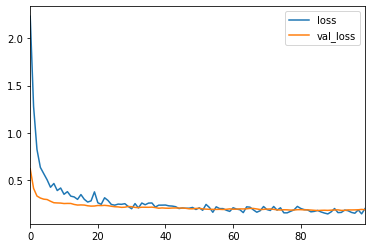

In [50]:
df_his = pd.DataFrame(history.history)
df_his.plot()
plt.show()

In [51]:
train_label_predicted = model.predict(train_X) 
train_label_predicted = train_label_predicted * train_labels_std + train_labels_mean

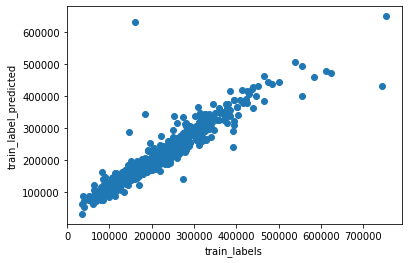

In [52]:
plt.figure()
plt.scatter(train_labels_origin, train_label_predicted)
plt.xlabel("train_labels")
plt.ylabel("train_label_predicted")
plt.plot()
plt.show()

# predict 

In [53]:
results = model.predict(test_X) 
results  = results * train_labels_std + train_labels_mean 

In [54]:
results = results.reshape(1,-1)[0]
print('test_x.shape={},  result.shape={}'.format(test_X.shape[0], len(results)))
dataset_test["SalePrice"] = pd.Series(results)

test_x.shape=1459,  result.shape=1459


In [55]:
submission = pd.concat([dataset_test['Id'], dataset_test['SalePrice']], axis = 1)
submission.to_csv("submission.csv", index = False, mode="w")
submission.head()

,Id,SalePrice
0,1461,127911.875000
1,1462,138830.171875
2,1463,183079.937500
3,1464,180800.281250
4,1465,175369.546875
